In [79]:
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import plotly.express as px
import xgboost as xgb
import pickle

In [80]:
from xgboost import XGBRegressor

In [81]:
df = pd.read_csv("SeoulBikeData.csv", encoding = 'unicode_escape', delimiter = ',')
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [82]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [83]:
count = df.isna().sum()

print(count)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [84]:
# the months will surely be more relevant than the full date  
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month']=df['Date'].dt.month
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-01-12                254     0             -5.2           37   
1    2017-01-12                204     1             -5.5           38   
2    2017-01-12                173     2             -6.0           39   
3    2017-01-12                107     3             -6.2           40   
4    2017-01-12                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  Month  
0     No Holiday             Yes      1  
1     No Holiday             Yes      1  
2     No Holiday             Yes      1  
3     No Holiday             Yes      1  
4     No Holiday             Yes      1  
...          ...             ...    ...  
8755  No Holiday             Yes     11  
8756  No Holiday             Yes     11  
8757  No Holiday             Yes     11  
8758  No Holiday             Yes     11  
8759  No Holiday             Yes     11  

[8760 rows x 15 columns]

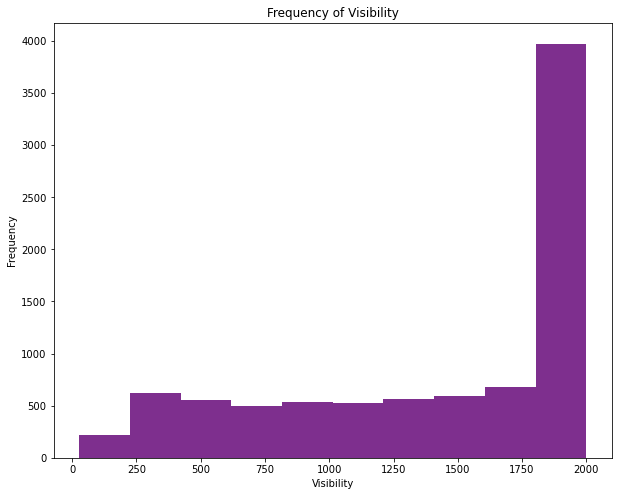

In [85]:
# We can do this for each variable to see the distribution and the possible values
fig, ax = plt.subplots(figsize=(10,8))
df['Visibility (10m)'].plot(kind='hist', color = '#7E2F8E')
plt.title('Frequency of Visibility')
plt.xlabel('Visibility')
plt.ylabel('Frequency')
plt.show()

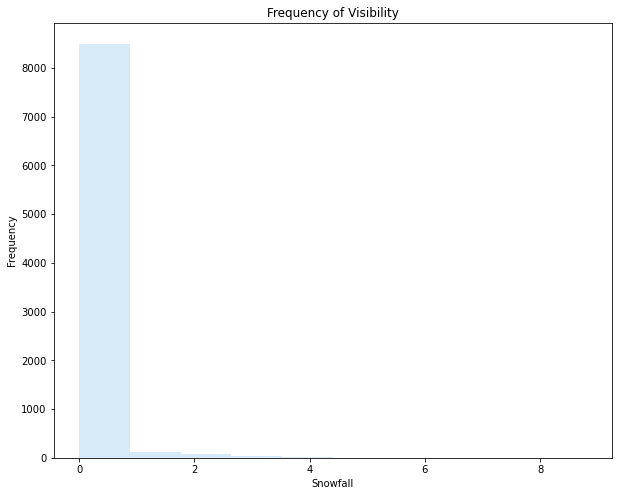

In [86]:
# We can see that Snowfall is biased
fig, ax = plt.subplots(figsize=(10,8))
df['Snowfall (cm)'].plot(kind='hist', color = '#D6EAF8')
plt.title('Frequency of Visibility')
plt.xlabel('Snowfall')
plt.ylabel('Frequency')
plt.show()

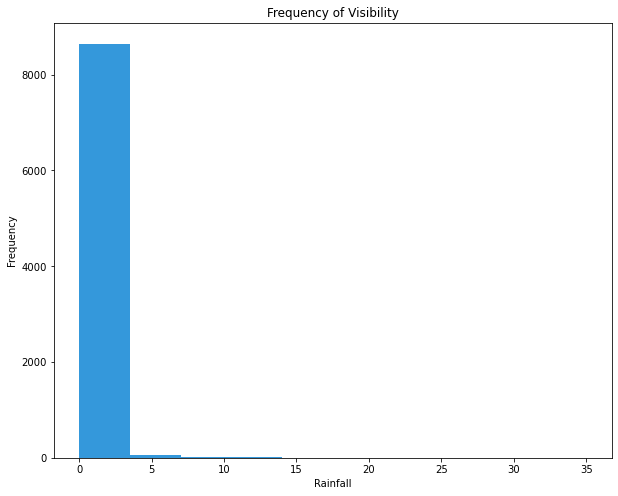

In [87]:
# We can see that Rainfall is biased
fig, ax = plt.subplots(figsize=(10,8))
df['Rainfall(mm)'].plot(kind='hist', color = '#3498DB')
plt.title('Frequency of Visibility')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()

In [88]:
fig = px.scatter(df, x="Month", y="Rented Bike Count", color="Month", marginal_y="violin",
           marginal_x="box", template="plotly")
fig.show()

In [89]:
fig = px.scatter(df, x="Hour", y="Rented Bike Count", color="Rented Bike Count", marginal_y="violin",
           marginal_x="box", template="seaborn")
fig.show()

In [90]:
fig = px.scatter(df, x="Temperature(°C)", y="Rented Bike Count", color="Rented Bike Count", marginal_y="violin",
           marginal_x="box", template="simple_white")
fig.show()

In [91]:
fig = px.scatter(df, x="Hour", y="Rented Bike Count", color="Temperature(°C)", marginal_y="violin",
           marginal_x="box", template="seaborn")
fig.show()
# We notice that there are more bikes rented when it is less cold and at peak times
# For a unique hour, there are more bikes rented for high temperature

In [92]:
df_bis = df.sort_values(by = "Rented Bike Count")
# Using px.bar there isn't an Y axes so we need to sort the values ourselves

In [93]:
fig = px.bar(df_bis, x="Hour", y="Rented Bike Count", color="Temperature(°C)", barmode="group",facet_col="Seasons",)
fig.show()
# So we can see that lots of people don't want to take the bicycle in Winter beacause of the weather
# Moreover, temperature has a great impact on the rented bike count because when it's too cold,people don't want to take the bicycle

In [94]:
fig = px.bar(df_bis, x="Wind speed (m/s)", y="Rented Bike Count", color="Rented Bike Count", barmode="group",facet_col="Seasons")
fig.show()

In [95]:
#fig = px.bar(df_bis, x="Hour", y="Rented Bike Count", color="Temperature(Â°C)",facet_col="Holiday")
fig = px.box(df,x="Holiday", y="Rented Bike Count", color = "Seasons")
fig.show()

In [96]:
fig = px.pie(df, values='Rented Bike Count', names='Seasons', title='Rented bike count by seasons')
fig.show()

In [97]:
fig = px.pie(df, values='Rented Bike Count', names='Month', title='Rented bike count by Month')
fig.show()

In [98]:
fig = px.pie(df, values='Rented Bike Count', names='Hour', title='Rented bike count by Hour')
fig.show()

In [99]:
fig = px.sunburst(df_bis, path=['Seasons', 'Month'], values='Rented Bike Count',
                  color='Temperature(°C)')
fig.show()

In [100]:
fig = px.box(df, x="Month", y="Rented Bike Count", color="Holiday", notched=True)
fig.show()

In [101]:
fig = px.scatter_matrix(df, dimensions=["Rented Bike Count", "Month", "Hour"], color="Temperature(°C)")
fig.show()

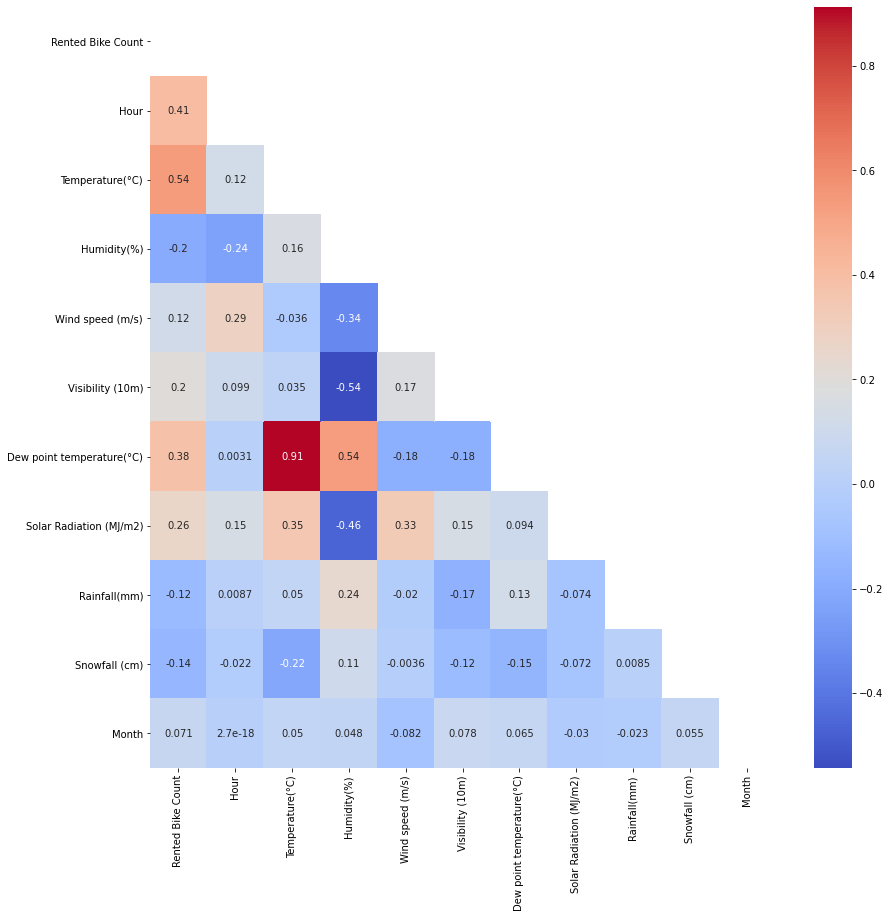

In [102]:
# Now that we understood each variable, we need to see the correlation between each of them
fig, ax = plt.subplots(figsize=(14,14))
sn.heatmap(df.corr(), annot=True, mask = np.triu(df.corr()),cmap = 'coolwarm')

plt.show()
# We saw that there is one big correlation (O.91) between "Dew Point Temperature" and "Temperature" so we can delete one of them

In [103]:
# Now, we need to see if there are biased variables
df.skew().sort_values(ascending=False)
# We can see that 2 features are particularly biaised : Rainfall and Snowfall so we'll delete them

Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
Solar Radiation (MJ/m2)       1.504040
Rented Bike Count             1.153428
Wind speed (m/s)              0.890955
Humidity(%)                   0.059579
Hour                          0.000000
Month                        -0.010458
Temperature(°C)              -0.198326
Dew point temperature(°C)    -0.367298
Visibility (10m)             -0.701786
dtype: float64

In [104]:
# We can now create a list with all the variables useful for our prediction model. It means all the variables except 'Dew point temperature', 'Rainfall' and 'Snowfall'
# We also can't have 'Rented Bike Count' because it's the feature we want to predict
Colonnes_Prediction = ['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Month']
Colonnes_Prediction

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Month']

In [105]:
df[Colonnes_Prediction]

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0        0             -5.2           37               2.2              2000   
1        1             -5.5           38               0.8              2000   
2        2             -6.0           39               1.0              2000   
3        3             -6.2           40               0.9              2000   
4        4             -6.0           36               2.3              2000   
...    ...              ...          ...               ...               ...   
8755    19              4.2           34               2.6              1894   
8756    20              3.4           37               2.3              2000   
8757    21              2.6           39               0.3              1968   
8758    22              2.1           41               1.0              1859   
8759    23              1.9           43               1.3              1909   

      Solar Radiation (MJ/m2)  Month  
0                         0.0      1  
1                         0.0      1  
2                         0.0      1  
3                         0.0      1  
4                         0.0      1  
...                       ...    ...  
8755                      0.0     11  
8756                      0.0     11  
8757                      0.0     11  
8758                      0.0     11  
8759                      0.0     11  

[8760 rows x 7 columns]

In [106]:
x = df[Colonnes_Prediction]
y = df['Rented Bike Count']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0)

In [107]:
## Linear regression
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

In [108]:
# We calculate the MSE and not the confusion matrix because our predicted values are continuous
print('Mean Squared Error: %.3f' % (metrics.mean_squared_error(y_test, y_pred)/2190))
# So we have an absolute error of 105 bikes

Mean Squared Error: 104.777


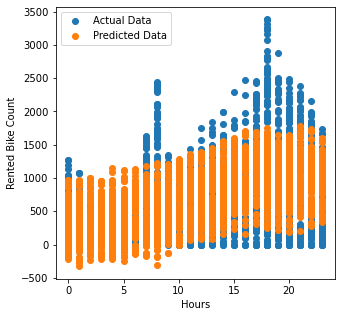

In [109]:
plt.scatter(x_test['Hour'],y_test, label="Actual Data")
plt.scatter(x_test['Hour'],np.rint(y_pred), label="Predicted Data")
plt.xlabel("Hours")
plt.ylabel("Rented Bike Count")
plt.legend(loc='best')
plt.show()

In [110]:
## grid search for lasso
param_grid_lasso = {'alpha':np.arange(0,10,0.25), 'max_iter': np.arange(1000,10000,1000)}
grid_lasso = GridSearchCV(linear_model.Lasso(), param_grid_lasso,cv=5)
grid_lasso.fit(x_train,y_train)

C:\Users\Users\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\Users\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

C:\Users\Users\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 593057239.1596072, tolerance: 222341.66737983256

C:\Users\Users\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\Users\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning:

Coordinate descent 

C:\Users\Users\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 584571807.7142481, tolerance: 219635.41268217278

C:\Users\Users\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\Users\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

C:\Users\Users\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 573023576.089138, tolerance: 216666.6274391933

C:\Users\Users\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

C:\Users\Users\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 593057239.1596032, tolerance: 222341.66737983256

C:\Users\Users\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\Users\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

C:\Users\Users\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 581397929.2346835, tolerance: 216512.59041575337

C:\Users\Users\anaconda3\lib\site-packages\sklearn\model_selection\_validatio

C:\Users\Users\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 573023576.0891362, tolerance: 216666.6274391933

C:\Users\Users\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

C:\Users\Users\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

C:\Users\Users\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 579591764.7035322, tolerance: 216874.27150941777

C:\Users\Users\anaconda3\lib\site-packages\sklearn\model_selection\_validation

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  ,
       8.25, 8.5 , 8.75, 9.  , 9.25, 9.5 , 9.75]),
                         'max_iter': array([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])})

In [111]:
grid_lasso.best_params_

{'alpha': 0.0, 'max_iter': 1000}

In [112]:
## Lasso Regression
lassoReg = linear_model.Lasso(alpha=7, max_iter = 100000)
lassoReg.fit(x_train,y_train)
y_pred_lasso = lassoReg.predict(x_test)

In [113]:
print('Mean Squared Error: %.3f' % (metrics.mean_squared_error(y_test, y_pred_lasso)/2190))

Mean Squared Error: 104.849


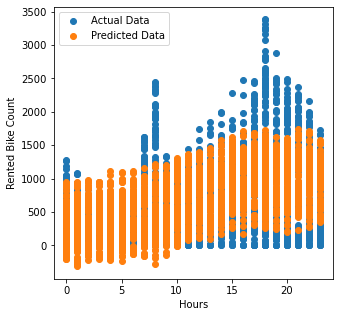

In [114]:
plt.scatter(x_test['Hour'],y_test, label="Actual Data")
plt.scatter(x_test['Hour'],np.rint(y_pred_lasso), label="Predicted Data")
plt.xlabel("Hours")
plt.ylabel("Rented Bike Count")
plt.legend(loc='best')
plt.show()

In [115]:
## grid search for Decision Tree
param_grid_tree = {'max_depth':np.arange(0,10), 'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best','random']}
grid_tree = GridSearchCV(DecisionTreeRegressor(), param_grid_tree,cv=5)
grid_tree.fit(x_train,y_train)

C:\Users\Users\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Users\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Users\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Users\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 


C:\Users\Users\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  

C:\Users\Users\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Users\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Users\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Users\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 


C:\Users\Users\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [116]:
grid_tree.best_params_

{'criterion': 'friedman_mse', 'max_depth': 7, 'splitter': 'best'}

In [117]:
## Decision Tree
regr = DecisionTreeRegressor(max_depth=7,splitter='best', criterion = 'mse')
regr.fit(x_train, y_train)
y_pred_tree = regr.predict(x_test)
regr.score(x_train,y_train)

0.7559229928929034

In [118]:
print('Mean Squared Error: %.3f' % (metrics.mean_squared_error(y_test, y_pred_tree)/2190))

Mean Squared Error: 63.074


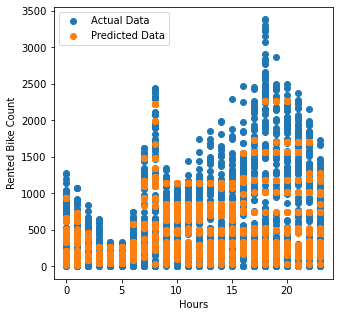

In [119]:
plt.scatter(x_test['Hour'],y_test, label="Actual Data")
plt.scatter(x_test['Hour'],np.rint(y_pred_tree), label="Predicted Data")
plt.xlabel("Hours")
plt.ylabel("Rented Bike Count")
plt.legend(loc='best')
plt.show()

In [120]:
## grid search for random forest
param_grid_forest = {'max_depth':np.arange(12,20), 'n_estimators' : np.arange(300,301)}
grid_forest = GridSearchCV(RandomForestRegressor(), param_grid_forest,cv=5)
grid_forest.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([12, 13, 14, 15, 16, 17, 18, 19]),
                         'n_estimators': array([300])})

In [121]:
grid_forest.best_params_

{'max_depth': 18, 'n_estimators': 300}

In [122]:
## Random Forest
rfr = RandomForestRegressor(max_depth=19,n_estimators = 300)
rfr.fit(x_train, y_train)
y_pred_forest = rfr.predict(x_test)

In [123]:
print('Mean Squared Error: %.3f' % (metrics.mean_squared_error(y_test, y_pred_forest)/2190))

Mean Squared Error: 46.720


In [124]:
y_pred_forest = [round(num) for num in y_pred_forest]

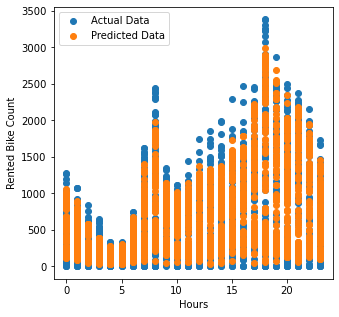

In [125]:
plt.scatter(x_test['Hour'],y_test, label="Actual Data")
plt.scatter(x_test['Hour'],np.rint(y_pred_forest), label="Predicted Data")
plt.xlabel("Hours")
plt.ylabel("Rented Bike Count")
plt.legend(loc='best')
plt.show()

In [127]:
# grid search cv for xgboost
param_grid_xgboost = {'max_depth':np.arange(7,8),'learning_rate':np.arange(0.1,0.2,0.1),'colsample_bytree':np.arange(0.9,1,0.1),
                     'alpha' :np.arange(8,14), 'n_estimators':np.arange(100,400,100)}
grid_xgboost = GridSearchCV(xgb.XGBRegressor(), param_grid_xgboost,cv=5)
grid_xgboost.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...e,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                               

In [ ]:
grid_xgboost.best_params_

In [ ]:
# XGboost
xg_reg = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.9, learning_rate = 0.1,
                max_depth = 7, alpha = 12, n_estimators = 200)
xg_reg.fit(x_train, y_train)
y_pred_xgboost = xg_reg.predict(x_test)

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost))
print("RMSE: %f" % (rmse))
print('Mean Squared Error: %.3f' % (metrics.mean_squared_error(y_test, y_pred_xgboost)/2190))

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
plt.scatter(x_test['Hour'],y_test, label="Actual Data")
plt.scatter(x_test['Hour'],np.rint(y_pred_xgboost), label="Predicted Data")
plt.xlabel("Hours")
plt.ylabel("Rented Bike Count")
plt.legend(loc='best')
plt.show()

In [ ]:
df_pred = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred, 'y_pred_lasso':y_pred_lasso, 'y_pred_tree': y_pred_tree, 'y_pred_forest':y_pred_forest, 'y_pred_xgboost':y_pred_xgboost})
df_pred

In [ ]:
fig = px.scatter_matrix(df_pred, dimensions=["y_test", "y_pred", "y_pred_lasso","y_pred_tree",'y_pred_forest','y_pred_xgboost'])
fig.show()

In [ ]:
fig = px.scatter(df_pred, x="y_pred", y="y_test", template="simple_white",trendline="ols", color = "y_test")
fig.show()

In [ ]:
fig = px.scatter(df_pred, x="y_pred_lasso", y="y_test", template="simple_white",trendline="ols", color = "y_test")
fig.show()

In [ ]:
fig = px.scatter(df_pred, x="y_pred_tree", y="y_test", template="simple_white",trendline="ols", color = "y_test")
fig.show()

In [ ]:
fig = px.scatter(df_pred, x="y_pred_forest", y="y_test", template="simple_white",trendline="ols", color = "y_test")
fig.show()

In [ ]:
fig = px.scatter(df_pred, x="y_pred_xgboost", y="y_test", template="simple_white",trendline="ols", color = "y_test")
fig.show()

In [ ]:
#Eventhough we obtain a slightly best MSE with the xgboost model, we encountered some problems of conversion 
# between the type no array and dataframe so we needed to put final_features = false which was risky.
#That's why we chose the random forest model, with the random forest regressor rfr

pickle.dump(rfr, open('model.pkl','wb'))

In [ ]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict(x_test))

In [ ]:
#You can enter the values here in case you don't want to do it on the webpage 
# (you need to run the API called app.py to run this block)

import requests

url = 'http://localhost:5000/results'
r = requests.post(url,json={'Hour':0, 'Temperature(°C)':-5.2, 'Humidity(%)':37, 'Wind speed (m/s)':2.2, 'Visibility (10m)':400, 'Solar Radiation (MJ/m2)':0.0, 'Month':1})

print(r.json())